       Feature                    Common Name Chemical Class  \
0  47_SHIK 0.0      Shikimic acid (Shikimate)  Organic acids   
1  48_SUCC_0.0      Succinic acid (Succinate)  Organic acids   
2   21_FUM_0.0        Fumaric acid (Fumarate)  Organic acids   
3   11_AMP 0.0  Adenosine monophosphate (AMP)    Nucleotides   
4   53_UMP 0.0    Uridine monophosphate (UMP)    Nucleotides   

                                             Pathway  \
0  Shikimate pathway (aromatic amino acid biosynt...   
1                            TCA cycle (Krebs cycle)   
2                                          TCA cycle   
3                       Purine nucleotide metabolism   
4                   Pyrimidine nucleotide metabolism   

                                       Ripening Role  
0  Increases - pathway active for aroma compound ...  
1  Increases - elevated respiration during climac...  
2         Increases with respiration during ripening  
3  ATP degradation product - energy turnover duri...  
4  

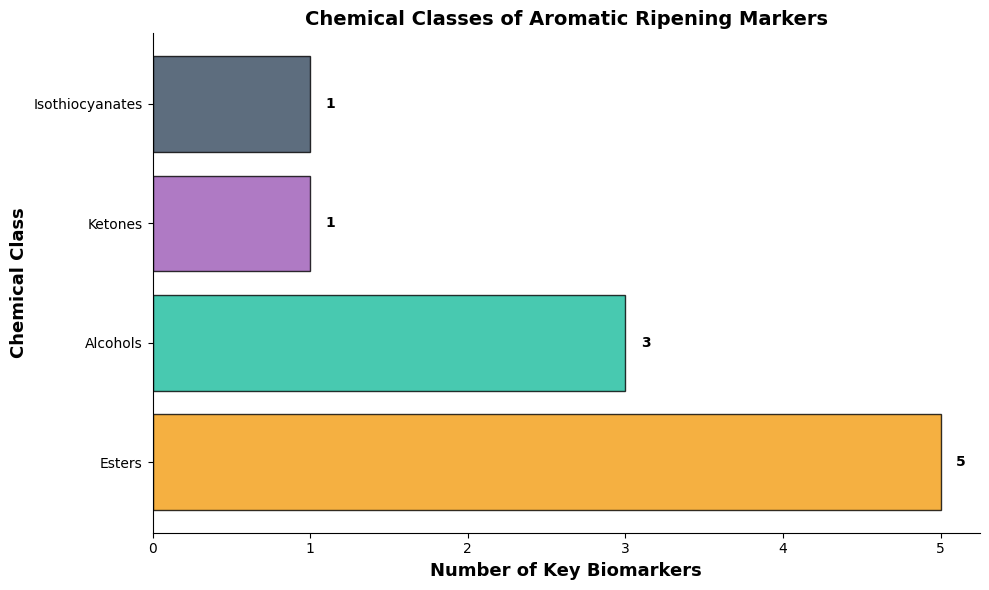

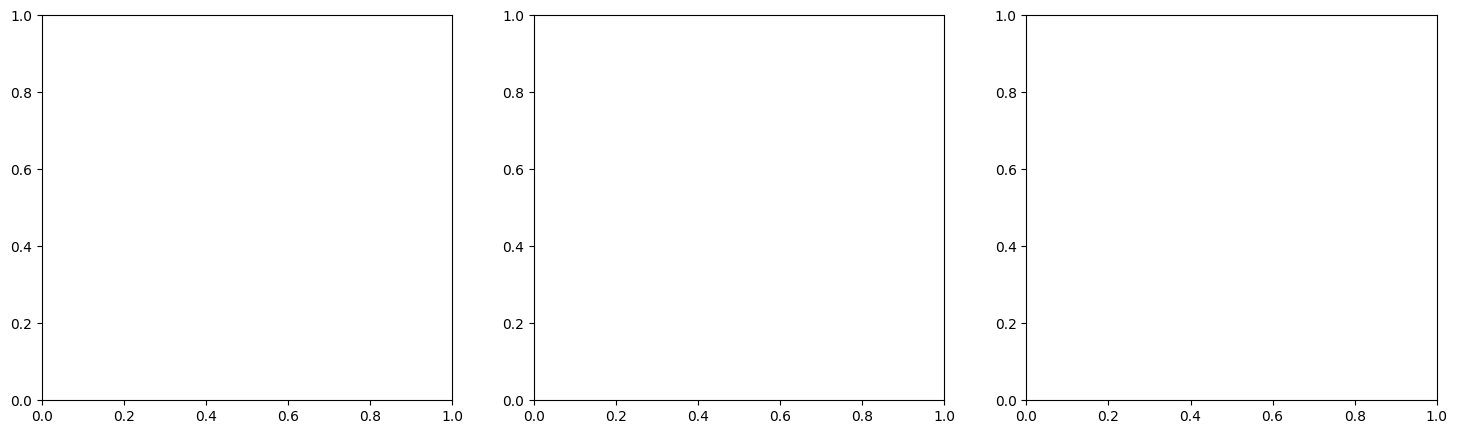

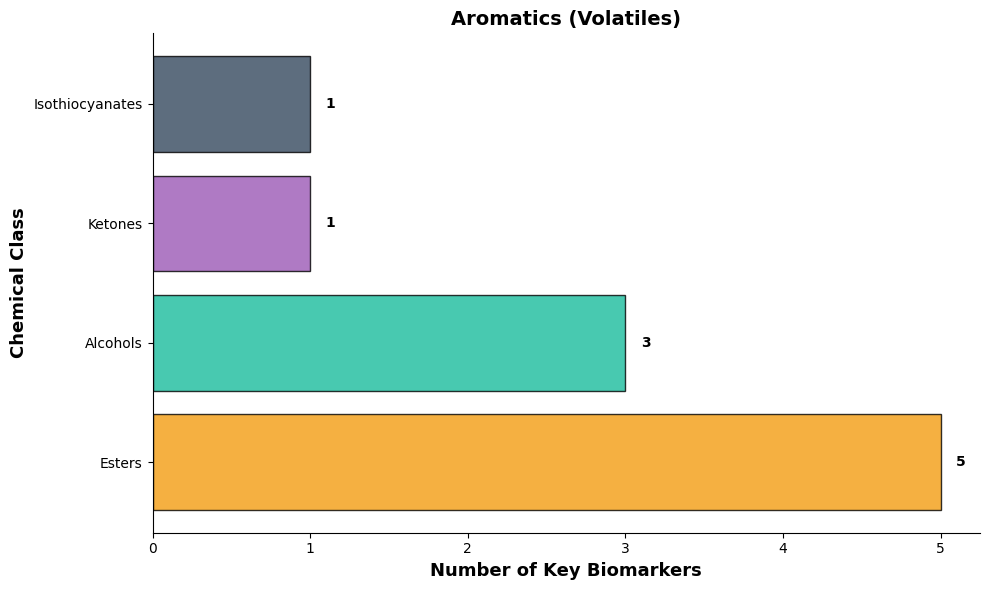

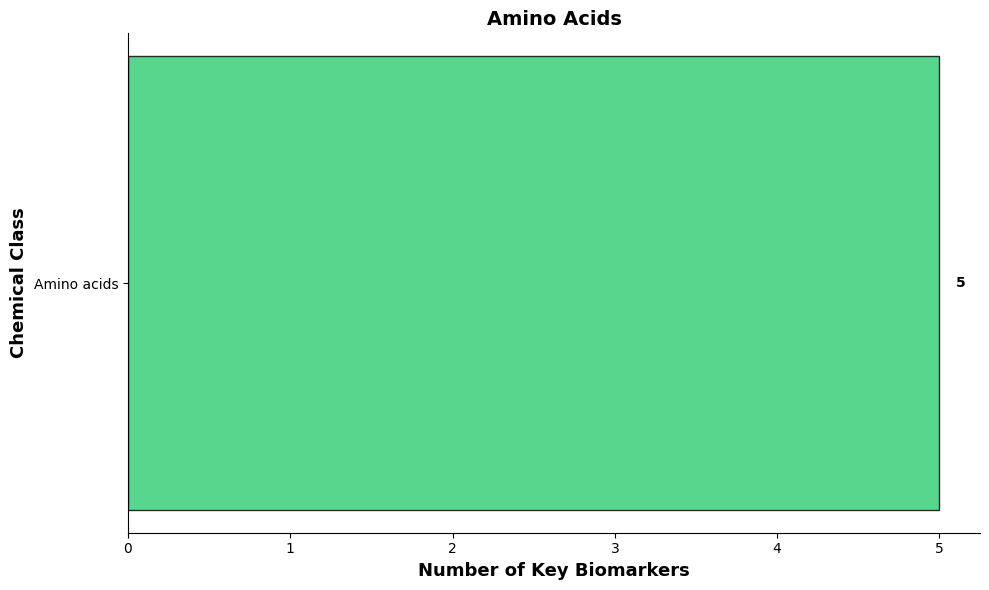

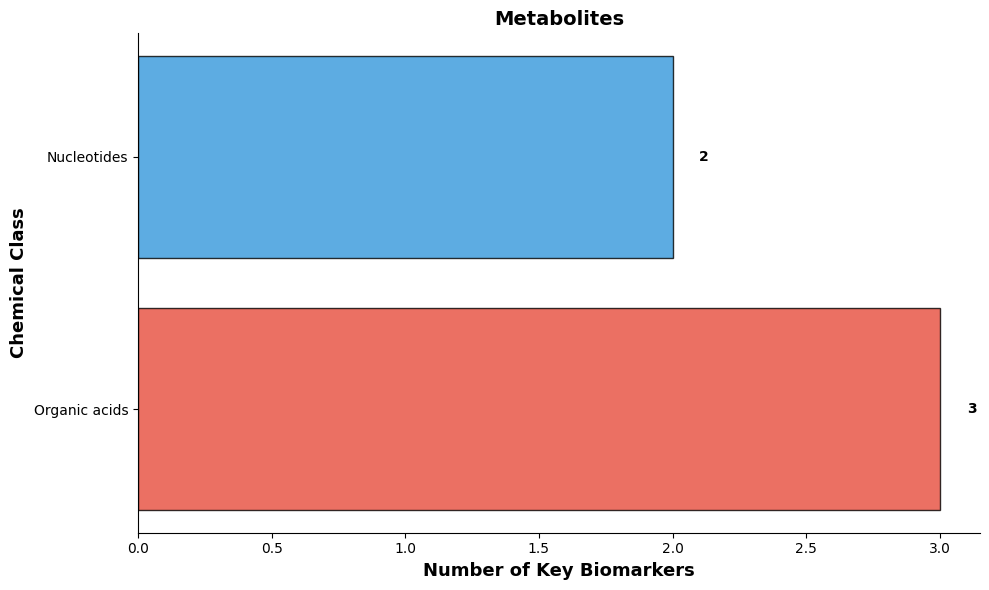

In [3]:
from compound_classification import (
    plot_chemical_classes, 
    create_summary_table,
    COMPOUND_DATABASE
)

# ============================================================================
# Example 1: Plot aromatics chemical classes
# ============================================================================
aromatic_features = [
    "Ethyl 3-methylbutanoate Area",
    "2-Methylbutyl acetate Area",
    "Isoamyl acetate Area",
    "trans-2-Penten-1-ol Area",
    "(Z)-2-Penten-1-ol Area",
    "Propyl acetate Area",
    "3-Hexanone Area",
    "3-Methyl-2-buten-1-ol Area",
    "Methyl isovalerate Area",
    "Allyl isothiocyanate Area",
]

fig, df = plot_chemical_classes(
    aromatic_features, 
    title="Chemical Classes of Aromatic Ripening Markers"
)
fig.savefig('aromatics_chemical_classes.png', dpi=300, bbox_inches='tight')

# ============================================================================
# Example 2: Create detailed table for your paper
# ============================================================================
metabolite_features = [
    "47_SHIK 0.0 : Conc. (nM)",
    "48_SUCC_0.0 : Conc. (nM)",
    "21_FUM_0.0 : Conc. (nM)",
    "11_AMP 0.0 : Conc. (nM)",
    "53_UMP 0.0 : Conc. (nM)",
]

table = create_summary_table(metabolite_features)
print(table)
table.to_csv('metabolite_classifications.csv', index=False)

# ============================================================================
# Example 3: Compare across omics types
# ============================================================================
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Aromatics
fig1, _ = plot_chemical_classes(aromatic_features, 
                                title="Aromatics (Volatiles)")
# Amino acids  
amino_features = ['ASP', 'GABA', 'VAL', 'GLN', 'GLU']
fig2, _ = plot_chemical_classes(amino_features,
                                title="Amino Acids")
# Metabolites
fig3, _ = plot_chemical_classes(metabolite_features,
                                title="Metabolites")

In [6]:
import requests

name = "Ethyl 3-methylbutanoate"
url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{name}/classification/JSON"
r = requests.get(url, timeout=10)

print(r.status_code)
print(r.text)


ReadTimeout: HTTPSConnectionPool(host='pubchem.ncbi.nlm.nih.gov', port=443): Read timed out. (read timeout=10)

In [13]:
from preprocessing import load_and_impute

df = load_and_impute("../data/badata.csv", group_col='Groups', impute=True, fill_value=0)

c:\Users\uqkmuroi\gitcode\ML_omics\venv\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\uqkmuroi\gitcode\ML_omics\venv\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\uqkmuroi\gitcode\ML_omics\venv\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\uqkmuroi\gitcode\ML_omics\venv\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\uqkmuroi\gitcode\ML_omics\venv\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\uqkmuroi\gitcode\ML_omics\venv\lib\site-packag

In [14]:
print(df.dtypes.value_counts())
print(df.select_dtypes(exclude=["number"]).columns)

int64      68
float64    41
object      2
Name: count, dtype: int64
Index(['Unnamed: 0', 'Groups'], dtype='object')


In [16]:
print(df['(Z)-4-Heptenal Area'])

0       397.0
1       210.0
2       303.5
3       303.5
4      1518.0
5       380.0
6       374.0
7       220.0
8     20645.0
9     34127.0
10    30464.0
11    36510.0
Name: (Z)-4-Heptenal Area, dtype: float64
